In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [227]:
for (k, v) in receipts.items():
    if v > 1e08:
        print(k, v)

C00002931 218307264.98999998
AMERICAN EXPRESS 272251571.99000007
ActBlue Technical Services 107211159.95976588
American Express 402430757.3674993
Paychex 245749787.83055723
C00208991 222611012.88000038
C00193342 40356273057.24324
C00019331 166593530.40000126
ADP 196686724.92999932
C00000935 3226416573.2402167
Google 113762138.10000001
C00140590 101089680.79999997
C00330894 137938806.49999627
C00010603 3527467762.9799156
C00105668 241187545.61988562
C00005561 496258859.8400116
C00025254 153517873.35000488
C00099267 126922619.77000181
C00178038 119772695.91000155
P80003338 113779897.50999993
P00003392 433974380.03000015
C00042622 141641083.8800003
C00042366 487608058.34999305
C00016899 324318888.39001334
C00031054 187173692.29000235
C00165688 197611700.50999945
CMDI 102565685.45999978
C00003418 1873764866.5303586
C00075820 2072748735.9300823
NATIONAL REPUBLICAN CONGRESSIONAL COMMITTEE 100186935.92000003
C00401224 4750853932.788272
Majority Strategies 163905468.81999987
C00215905 21826176

In [2]:

edges = set()

from pathlib import Path
import sys
last_write = "------------------------------------------"
donations = Counter()
receipts = Counter()
for f in Path("totals").glob("*.parquet"):
    if "_long" in str(f):
        continue
    if (last_write[12] != str(f)[12]):
        sys.stdout.write("\n" + str(f))
        last_write = str(f)
    fin = pd.read_parquet(f)
    sys.stdout.write(".")
    for id1, id2, amt in zip(fin.donor, fin.recipient, fin.amount):
        try:
            donations[id1] += amt
            receipts[id2] += amt
        except TypeError:
            continue
        edges.add((id1, id2))


totals/20100101.parquet...............................
totals/20100201.parquet...........................
totals/20100301.parquet..............................
totals/20100401.parquet..............................
totals/20100501.parquet...............................
totals/20100601.parquet..............................
totals/20100701.parquet...............................
totals/20100801.parquet...............................
totals/20100901.parquet..............................
totals/20101001.parquet...............................
totals/20101101.parquet..............................
totals/20101201.parquet..............................
totals/20110101.parquet...............................
totals/20110201.parquet............................
totals/20110301.parquet..............................
totals/20110401.parquet..............................
totals/20110502.parquet.............................
totals/20110601.parquet..............................
totals/20110701.parquet....

In [228]:
# Minimum appearances to be used in network construction
THRESHOLD = 9

In [229]:
class IdList(dict):
    """
    A self incrementing key list; assigns sequential numbers to every value it encounters.
    """
    def __missing__(self, key):
        ix = len(self)
        self[key] = ix
        return ix
ids = IdList()

Count all nodes that have more than 10 edges; 

In [54]:
from collections import Counter
counts = Counter()
output = open("/drobo/FEC/contribs.edgelist", "w")
print("counting edges")

# Only keep individual and Committees--not Best Buy, etc.

clear_codes = set(["C", "I"])
for i, (a, b) in enumerate(edges):
    if not a[0] in clear_codes or not b[0] in clear_codes:
        continue
    counts[a] += 1
    counts[b] += 1
    if i % 10000 == 0:
        sys.stdout.write("\r" + "_" * 120 + "\r" + "X" * int(i/len(edges)*120))
        sys.stdout.flush()
sys.stdout.write("\n")
n_written = 0
total_out = Counter()
total_in = Counter()
print("Writing high-value edges")
for i, (a, b) in enumerate(edges):
    if counts[a] > THRESHOLD and counts[b] > THRESHOLD:
        id1 = ids[a]
        id2 = ids[b]
        output.write(f"{id1} {id2}\n")
        n_written += 1
    if i % 10000 == 0:
        sys.stdout.write("\r" + "_" * 120 + "\r" + "X" * int(i/len(edges)*120))
        sys.stdout.flush()
output.close()
sys.stdout.write("\n")
print(f"Written {len(ids)} nodes and {n_written} edges")

counting edges
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_
Writing high-value edges
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_
Written 17005 nodes and 973599 edges


In [5]:
# with threshold 10: Written 125658 nodes and 2802488 edges

In [55]:
import pandas as pd
id_lookup = pd.DataFrame({"id": list(ids.values()), "label": list(ids.keys())}).set_index("id")
id_lookup.to_parquet("/drobo/FEC/id_lookup.parquet")

In [57]:
if False:
    last_write = "------------------------------------------"

    for f in Path("totals").glob("2020*.parquet"):
        if not "_long" in str(f):
            continue
        if (last_write[12] != str(f)[12]):
            sys.stdout.write("\n" + str(f))
            last_write = str(f)
        try:
            fin = pd.read_parquet(f)
            matching = fin[fin.recipient.apply(lambda x: x in ids)]
            matching = matching[matching.donor.apply(lambda x: x in ids)]
            matching.to_parquet(Path("/drobo/tmp/keeping_donations") / f.name)
            sys.stdout.write(".")
        except AttributeError:
            sys.stdout.write("X")
            continue

In [60]:
!~/snap/examples/node2vec/node2vec -i:/drobo/FEC/contribs.edgelist -v -o:/drobo/embedding_1.txt -l20 -r20 -k8 -d64


An algorithmic framework for representational learning on graphs. [Apr 16 2020]
Input graph path (-i:)=/drobo/FEC/contribs.edgelist
Output graph path (-o:)=/drobo/embedding_1.txt
Number of dimensions. Default is 128 (-d:)=128
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=NO
Graph is weighted. (-w)=NO
Output random walks instead of embeddings. (-ow)=NO
Read 973599 lines from /drobo/FEC/contribs.edgelist
Preprocessing progress: 99.97% 
Walking Progress: 99.97%
Learning Progress: 99.97% 


In [61]:
import numpy as np

for i, line in enumerate(open("/drobo/embedding_1.txt")):
    if i == 0:
        n, dims = map(int, line.rstrip().split(" "))
        mat = np.zeros((n, dims), np.float32)
        names = []
    else:
        id, rows = line.rstrip().split(" ", 1)
        idx = int(id)
        rows = np.array(rows.split(" "))
        mat[idx,:] = rows
d = mat

In [335]:
import csrgraph as cg
import nodevectors
from nodevectors import Node2Vec

N = 32
G = cg.read_edgelist("/drobo/FEC/contribs.edgelist", sep=" ")

print("Model read")
ggvec_model = nodevectors.Node2Vec(n_components = 32, walklen=20, epochs = 100, verbose = True)
ggvec_model = nodevectors.ProNE(n_components=N, verbose = True)
embeddings = ggvec_model.fit(G)

# This doesn't actually work, but it does population the model so that 'predict' can pull them out.
# 4.7 hours on 160K nodes, 2M edges.

rows = id_lookup.shape[0]

import numpy as np
d = np.zeros((rows, N))
for i in range(d.shape[0]):
    d[i] = ggvec_model.predict(i)



Model read


In [336]:
import umap
embedded = umap.UMAP(n_neighbors=10, random_state=1).fit_transform(d)

In [337]:
g = pd.DataFrame(embedded, columns = ['x', 'y'])
g.reset_index(inplace = True)

In [338]:
import altair as alt


In [339]:
#g = pd.read_csv("/tmp/nodes.csv", index_col="index")
df0 = g.groupby(lambda x: x).nth(0).reset_index()[['index', 'x', 'y']].rename({"index": "id"}, axis=1)
df0

,id,x,y
0,0,12.258419,7.230939
1,1,10.591818,10.419235
2,2,8.237119,1.488115
3,3,10.857407,1.484817
4,4,5.832960,-0.051140
...,...,...,...
17000,17000,-5.473612,5.008398
17001,17001,12.444310,3.162680
17002,17002,12.467736,3.088062
17003,17003,12.438660,3.214553


In [342]:
#df0 = pd.DataFrame({'x': embedded.T[0], 'y': embedded.T[1], 'id': np.arange(embedded.shape[0])}).set_index("id")
df = df0.join(id_lookup, how="left")
df['category'] = "entity"
df.sample(n=10)
df.label.fillna("", inplace=True)
df.reset_index(drop = True, inplace = True)
df.sample(10)


,id,x,y,label,category
944,944,9.204233,-3.243640,C00648493,entity
3127,3127,12.464499,10.401344,C00386532,entity
11187,11187,8.815372,3.322296,I_IRL_BARG_19087_,entity
5462,5462,4.104904,8.446372,C00506709,entity
3780,3780,7.050702,11.479909,C00686980,entity
12001,12001,11.642546,7.068325,C00390963,entity
14894,14894,10.973035,13.790780,C00723270,entity
4026,4026,7.452445,1.622736,I_JAMES_SMITH_02109_,entity
13840,13840,9.135824,-1.474485,I_CHRISTOPHER_EHRET_93012_,entity
10377,10377,13.099463,9.689094,I_SAMUEL_SKINNER_60093_,entity


In [343]:
df = df.set_index("label")

In [344]:
receipt_totals = pd.DataFrame(zip(receipts.keys(), receipts.values()), columns = ['label', 'receipts']).set_index('label')
donation_totals = pd.DataFrame(zip(donations.keys(), donations.values()), columns = ['label', 'donations']).set_index('label')

In [345]:
df2 = df.join(receipt_totals).join(donation_totals).reset_index()

In [346]:
df2.donations.fillna(0, inplace = True)
df2.receipts.fillna(0, inplace = True)

# Add Committe metadata

In [347]:
committees = [str(f) for f in Path(".").glob("committees/committee_summary*")]
committees.sort()
committees.reverse()
bulk = []
for committee in committees:
    fr = pd.read_csv(committee, low_memory=False)
    bulk.append(fr)
bulk = pd.concat(bulk, ignore_index=False)
bulk.sample(n=5)
bulk2 = bulk.drop_duplicates("CMTE_ID")

In [348]:
metacom = bulk2[['CMTE_TP', 'CMTE_DSGN', 'CMTE_ST', 'CMTE_NM', 'CAND_ID', "CMTE_ID"]]
metacom = metacom.fillna("")
metacom.sample(3)

,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM,CAND_ID,CMTE_ID
3254,N,U,TN,912 PROJECT TENNESSEE VICTORY FUND,,C00493353
3338,H,P,WA,CITIZENS TO ELECT COFCHIN FOR CONGRESS,,C00415497
4360,H,P,CA,JUDY CHU FOR CONGRESS,H0CA32101,C00458125


## Integrate Candidate metadata to committee metadata

Especially useful for party information

In [349]:
#nodes = pd.read_csv("/tmp/nodes.csv")
#nodes[nodes.CMTE_TP == "P"]


In [350]:

bulk = []
cands = [str(f) for f in Path("candidates/").glob("*.csv")]
cands.sort()
cands.reverse()
for cand in cands:
    fr = pd.read_csv(cand, low_memory=False)
    bulk.append(fr)
bulk = pd.concat(bulk, ignore_index=False)[["Cand_Id", "Cand_Party_Affiliation", "Cand_Office"]]
bulk2 = bulk.drop_duplicates("Cand_Id")

metacom2 = bulk2.set_index("Cand_Id").join(metacom.set_index("CAND_ID"), how = 'right')#.drop("Cand_Name", index = 1)
#metacom2 = metacom2.reset_index(drop=True)
metacom2.sample(5)

,Cand_Party_Affiliation,Cand_Office,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM,CMTE_ID
,NaN,NaN,H,P,NC,COMMITTEE TO ELECT DAN MURPHY,C00640813
,NaN,NaN,N,J,IL,SEAN CASTEN VICTORY FUND 2020,C00728857
,NaN,NaN,O,U,CO,COLORADO FUTURE FUND,C00527523
,NaN,NaN,I,U,IA,"ALEXANDER, DOUGLAS RAY",C90017427
S0IN00103,REP,S,S,P,IN,BEHNEY FOR US SENATE,C00466565


In [351]:
df3 = df2.set_index("label").join(metacom2.set_index("CMTE_ID"), how='left').rename_axis("label").reset_index()
df3.loc[pd.notna(df3.CMTE_NM),"label"] = df3.CMTE_NM[pd.notna(df3.CMTE_NM)]
df3.sample(n=3)

,label,id,x,y,category,receipts,donations,Cand_Party_Affiliation,Cand_Office,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM
5115,AON CORPORATION POLITICAL ACTION COMMITTEE,5115,13.187322,8.447771,entity,1433186.87,2552895.1,NaN,NaN,Q,B,IL,AON CORPORATION POLITICAL ACTION COMMITTEE
7213,I_ALVIN_MCQUINN_34102_,7213,8.988631,14.481421,entity,0.00,266367.0,NaN,NaN,NaN,NaN,NaN,NaN
14287,STEVE SMITH FOR CONGRESS,14287,10.070132,1.607216,entity,445475.35,307508.7,NaN,NaN,H,P,AZ,STEVE SMITH FOR CONGRESS


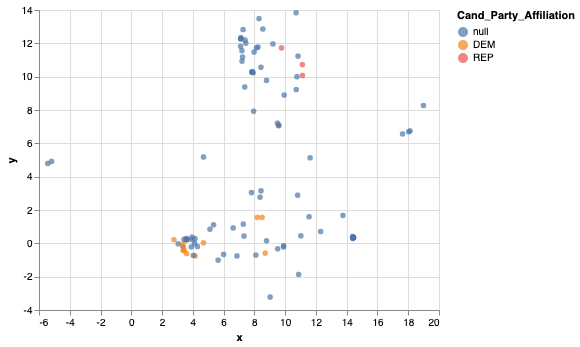

In [352]:
alt.data_transformers.enable('json')
alt.Chart(df3.sort_values("receipts", ascending = False).head(100)).mark_circle().encode(x='x', y='y', tooltip ="label", color = 'Cand_Party_Affiliation')

In [358]:
import random
id_hash = dict(zip(id_))

In [366]:
my_ids = set(id_lookup.label)

0               C00669655
1               C00669655
2               C00669655
0               C00358234
0               C00419036
             ...         
8                    None
9                    None
10    Vision Service Plan
11                   None
12                   None
Name: recipient, Length: 4561, dtype: object

In [367]:
outside_cands = []

sample_set = list(Path("/drobo/FEC/totals").glob("*_long.parquet"))
random.shuffle(sample_set)
n_points = 0
n_days = 0
# For initial scanning, I'm only loading 30 million points or so, not every goddamned donation.
while n_points < 2e7:
    f = sample_set.pop()
    n_days += 1
    try:
        fin = pd.read_parquet(f)
        matching = fin[fin.recipient.apply(lambda x: x in my_ids)]
        matching = matching[matching.donor.apply(lambda x: x in my_ids)]
        outside_cands.append(matching)
        n_points += matching.shape[0]
        sys.stdout.write(f"{n_days} days, {n_points:,d} points\r")
    except AttributeError:
        sys.stdout.write("X")
        raise
        
outside = pd.concat(outside_cands)
#pd.read_parquet("/drobo/tmp/keeping_donations/20200128_long.parquet")
main = "recipient"
primary = "donor"

coords = df[["x", "y", "id"]]


In [398]:
total = outside.set_index(main).join(coords, how = "inner")\
.rename_axis(main).reset_index().set_index(primary)

j = total.join(coords, rsuffix = primary, how = 'inner').rename_axis(primary).reset_index()

j = j.rename(mapper = {"x" + primary: primary + ".x", "y" + primary: primary + ".y"}, axis = 1)

j['category'] = 'receipt edge'
j = j.set_index(main).join(metacom2.set_index("CMTE_ID")).reset_index().rename({"level_0": main}, axis = 1)
# Some random noise makes it easier to store in the quadtrees.
for d in ['x', 'y']:
    j[d] = j[d] + np.random.randn(j[d].shape[0]) * 0.001

In [399]:
lookup = dict(zip(metacom.CMTE_ID, metacom.CMTE_NM))
def rename(str):
    try:
        return lookup[str]
    except KeyError:
        return str
j['donor'] = j['donor'].apply(rename)
j['recipient'] = j['recipient'].apply(rename)
j['label'] = j['donor'] + " to " + j['recipient']

j.drop(["donor", "recipient", "index"], axis = 1, inplace = True)
j.sample(10)

,date,amount,x,y,id,donor.x,donor.y,iddonor,category,Cand_Party_Affiliation,Cand_Office,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM,label
10178047,2016-07-31,5.00,9.315855,-0.753144,258,6.867827,-0.756477,526,receipt edge,NaN,NaN,Q,U,DC,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,ACTBLUE to PROGRESSIVE CHANGE CAMPAIGN COMMITTEE
12765383,2016-10-20,5.00,7.324891,0.434786,581,6.867827,-0.756477,526,receipt edge,NaN,NaN,Q,U,DC,END CITIZENS UNITED,ACTBLUE to END CITIZENS UNITED
9211436,2017-10-07,5.00,6.867265,-0.755993,526,7.222266,-0.902141,6010,receipt edge,NaN,NaN,V,U,MA,ACTBLUE,I_RICHARD_GOLDSTEIN_11962_ to ACTBLUE
4357041,2013-09-30,50.00,8.366912,2.770252,672,9.130400,-1.545330,5101,receipt edge,NaN,NaN,Y,U,DC,DCCC,I___02238_ACTBLUE to DCCC
19322321,2019-12-12,3.00,3.598531,-0.614457,7418,6.867827,-0.756477,526,receipt edge,DEM,P,P,P,VT,BERNIE 2020,ACTBLUE to BERNIE 2020
18810443,2019-07-21,10.00,3.327116,-0.085236,1658,6.867827,-0.756477,526,receipt edge,DEM,P,P,P,MA,"WARREN FOR PRESIDENT, INC.","ACTBLUE to WARREN FOR PRESIDENT, INC."
1339553,2017-11-15,5.00,8.365895,2.768457,672,6.867827,-0.756477,526,receipt edge,NaN,NaN,Y,U,DC,DCCC,ACTBLUE to DCCC
7695622,2016-11-08,35.00,8.104508,-0.245608,959,6.867827,-0.756477,526,receipt edge,NaN,NaN,Q,U,DC,CHC BOLD PAC,ACTBLUE to CHC BOLD PAC
562259,2017-03-30,15.00,8.365602,2.770834,672,6.867827,-0.756477,526,receipt edge,NaN,NaN,Y,U,DC,DCCC,ACTBLUE to DCCC
8887828,2016-06-07,1.42,6.869312,-0.755553,526,7.295068,-2.003127,11939,receipt edge,NaN,NaN,V,U,MA,ACTBLUE,I_ANN_JONES_01054_ to ACTBLUE


# Calculate party lean for donors based on candidate affiliations

In [370]:
ledges = [(ids[l[0]], ids[l[1]]) for l in edges if l[0] in ids and l[1] in ids]
edges_df = pd.DataFrame(ledges, columns = ['a', 'b'])


In [371]:
left = edges_df.set_index('a').join(df3.set_index("id")['Cand_Party_Affiliation'])
right = edges_df.set_index('b').join(df3.set_index("id")['Cand_Party_Affiliation'])

In [372]:
biwise = pd.concat([left.set_index("b"), right.set_index("a")])
biwise = biwise[pd.notna(biwise.Cand_Party_Affiliation)]
biwise['count'] = 1


In [373]:
total_occurrences = biwise.reset_index().groupby("index")['count'].count().rename("total_occurrences")

In [374]:
two_party = biwise[biwise.Cand_Party_Affiliation.isin(["DEM", "REP"])]
dem = biwise[biwise.Cand_Party_Affiliation.isin(["DEM"])]

two_party_total = two_party.reset_index().groupby("index")["count"].sum().rename("two_party_total")
dem_party_total = dem.reset_index().groupby("index")["count"].sum().rename("dem_total")


In [375]:
df3 = df3.set_index("id").join(two_party_total).join(dem_party_total).join(total_occurrences).reset_index()
#df3.dem_total.fillna(0, inplace = True)
df3['Dem_Fraction'] = df3['dem_total']/df3['two_party_total']
df3['Dem_Fraction'].fillna(0.5, inplace = True)


In [376]:
df3.drop(["dem_total"], inplace = True, axis = 1)


In [377]:
df3.sample(5)

,id,label,x,y,category,receipts,donations,Cand_Party_Affiliation,Cand_Office,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM,two_party_total,total_occurrences,Dem_Fraction
1774,1774,INGRAM BARGE COMPANY POLITICAL ACTION COMMITTEE,11.323171,7.461606,entity,1022176.43,1854011.00,NaN,NaN,N,U,TN,INGRAM BARGE COMPANY POLITICAL ACTION COMMITTEE,NaN,NaN,0.5
10430,10430,I_GEORGE_SCHIMMEL_39216_,9.920195,1.153348,entity,0.00,434426.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3989,3989,I_ANNE_GERMANACOS_94117_,8.755244,-0.817700,entity,0.00,413471.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
1675,1675,WHIRLPOOL CORPORATION POLITICAL ACTION COMMITTEE,12.403116,7.817812,entity,764038.28,1533537.44,NaN,NaN,Q,B,DC,WHIRLPOOL CORPORATION POLITICAL ACTION COMMITTEE,NaN,NaN,0.5
12380,12380,I_GIUSEPPE_CECCHI_22101_,8.684056,13.516191,entity,0.00,919799.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5


In [378]:
"""
import pyarrow.feather as feather

df3['ix'] = np.arange(0, df3.shape[0])
df3.donations.fillna(0, inplace = True)
df3.receipts.fillna(0, inplace = True)
df3.fillna("", inplace = True)
df3['amount'] = df3['donations'] + df3['receipts']
df3.sort_values('amount')
"""

'\nimport pyarrow.feather as feather\n\ndf3[\'ix\'] = np.arange(0, df3.shape[0])\ndf3.donations.fillna(0, inplace = True)\ndf3.receipts.fillna(0, inplace = True)\ndf3.fillna("", inplace = True)\ndf3[\'amount\'] = df3[\'donations\'] + df3[\'receipts\']\ndf3.sort_values(\'amount\')\n'

In [379]:
means = df3.groupby(["Cand_Party_Affiliation"])[["x", "y"]].mean().loc[["DEM", "REP"]]
vec = means.loc["DEM"] - means.loc["REP"]



In [380]:
vec

x    0.847384
y   -8.364955
dtype: float32

In [402]:
biggies = df3.groupby(['id', "CMTE_NM"])['receipts'].sum().sort_values(ascending = False).head(4090)
biggies = pd.DataFrame({'id': biggies.reset_index().id, 'committee': biggies.reset_index().CMTE_NM}).set_index("id")



In [403]:
df3['amount'] = df3[['receipts', 'donations']].max(axis = 1)

## Merge the two datasets together

In [401]:
j['receipts'] = j['amount']
j['donations'] = j['amount']
df3['donor.x'] = df3['x']
df3['donor.y'] = df3['y']
joint = pd.concat([
    df3.drop(["two_party_total"], axis = 1), 
    j.drop(["iddonor"], axis = 1)
])
for col in joint:
    #get dtype for column
    dt = joint[col].dtype 
    #check if it is a number
    if str(dt) in ["float64", "int64"]:
        joint[col].fillna(0, inplace = True)
    elif str(dt) == "object":
        joint[col].fillna("", inplace = True)
    else:
        print(str(dt))

float32
float32
datetime64[ns]


In [408]:
joint.sort_values("amount", ascending = False, inplace = True)

In [409]:
joint[joint.label.str.contains("to BERNIE ")]

,id,label,x,y,category,receipts,donations,Cand_Party_Affiliation,Cand_Office,CMTE_TP,CMTE_DSGN,CMTE_ST,CMTE_NM,total_occurrences,Dem_Fraction,amount,donor.x,donor.y,date
14334694,670,NEW YORK STATE COMMITTEE OF THE WORKING FAMILI...,3.535101,0.169498,receipt edge,82653.73,82653.73,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,82653.73,11.334044,3.347574,2016-03-28
14334722,670,NEW YORK STATE COMMITTEE OF THE WORKING FAMILI...,3.536710,0.171890,receipt edge,77132.80,77132.80,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,77132.80,11.334044,3.347574,2016-03-28
14334756,670,NEW YORK STATE COMMITTEE OF THE WORKING FAMILI...,3.533578,0.172751,receipt edge,25059.00,25059.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,25059.00,11.334044,3.347574,2016-02-28
14334759,670,NEW YORK STATE COMMITTEE OF THE WORKING FAMILI...,3.534408,0.172442,receipt edge,14163.42,14163.42,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,14163.42,11.334044,3.347574,2016-02-28
14334746,670,NEW YORK STATE COMMITTEE OF THE WORKING FAMILI...,3.534885,0.172887,receipt edge,11100.00,11100.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,11100.00,11.334044,3.347574,2016-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473229,670,I_DAVID_CORNFIELD_98119_ to BERNIE 2016,3.534347,0.170491,receipt edge,-1000.00,-1000.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,-1000.00,5.493813,-0.469881,2015-10-10
15476373,670,I_RAY_BELLAMY_32303_ to BERNIE 2016,3.533533,0.172582,receipt edge,-1650.00,-1650.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,-1650.00,8.160419,-0.778173,2015-10-04
15476366,670,I_RAY_BELLAMY_32303_ to BERNIE 2016,3.535164,0.173252,receipt edge,-1650.00,-1650.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,-1650.00,8.160419,-0.778173,2015-10-04
15473466,670,I_EDWARD_RICE_22181_ to BERNIE 2016,3.535139,0.170176,receipt edge,-2300.00,-2300.00,DEM,P,P,P,VT,BERNIE 2016,0.0,0.0,-2300.00,6.179251,0.684137,2015-11-10


In [410]:
joint2 = joint.set_index("id").join(biggies)

In [411]:
joint2.committee.fillna("Other", inplace = True)

In [412]:
for field in ['category', 'Cand_Party_Affiliation', 'Cand_Office', 'CMTE_TP', 'CMTE_DSGN', 'CMTE_ST', 'committee']:
    print(field)
    joint2[field] = joint2[field].astype("category")
joint2['ix'] = np.arange(0, joint.shape[0], dtype = 'float32')

category
Cand_Party_Affiliation
Cand_Office
CMTE_TP
CMTE_DSGN
CMTE_ST
committee


In [414]:
joint = joint2
schema = []
for field in joint:
    t = str(joint[field].dtype)
    #print(field, t)
    if t == 'category':
        schema.append(pa.field(field, pa.dictionary('int32', 'string')))
    elif t.startswith("float"):
        schema.append(pa.field(field, 'float'))
    elif t == "object":
        schema.append(pa.field(field, 'string'))
    elif t.startswith('datetime'):
        schema.append(pa.field(field, 'date32'))
    elif t.startswith('int'):
        if field == 'ix':
            schema.append(pa.field("ix", 'float32'))
    else:
        raise
schema = pa.schema(schema)
schema

label: string
x: float
y: float
category: dictionary<values=string, indices=int32, ordered=0>
receipts: float
donations: float
Cand_Party_Affiliation: dictionary<values=string, indices=int32, ordered=0>
Cand_Office: dictionary<values=string, indices=int32, ordered=0>
CMTE_TP: dictionary<values=string, indices=int32, ordered=0>
CMTE_DSGN: dictionary<values=string, indices=int32, ordered=0>
CMTE_ST: dictionary<values=string, indices=int32, ordered=0>
CMTE_NM: string
total_occurrences: float
Dem_Fraction: float
amount: float
donor.x: float
donor.y: float
date: date32[day]
committee: dictionary<values=string, indices=int32, ordered=0>
ix: float

In [415]:
import pyarrow.feather as feather
feather.write_feather(pa.Table.from_pandas(joint, schema), "/drobo/tmp/full.feather")


In [416]:
!rm -rf /drobo/scrolly2/build/deepscatter/donations/; python ~/deepscatter/src/tiler.py --files /drobo/tmp/full.feather --limits -25 -25 25 25 --tile_size 64000 --destination /drobo/scrolly2/build/deepscatter/donations

In [ ]:
# joint.to_csv("/drobo/tmp/nodes.csv")

In [ ]:
# !rm -rf /drobo/scrolly2/build/deepscatter/donations/; python ~/deepscatter/src/tiler.py --files /drobo/tmp/nodes.csv --tile_size 64000 --destination /drobo/scrolly2/build/deepscatter/donations